# Bulding a discusion tree classifier

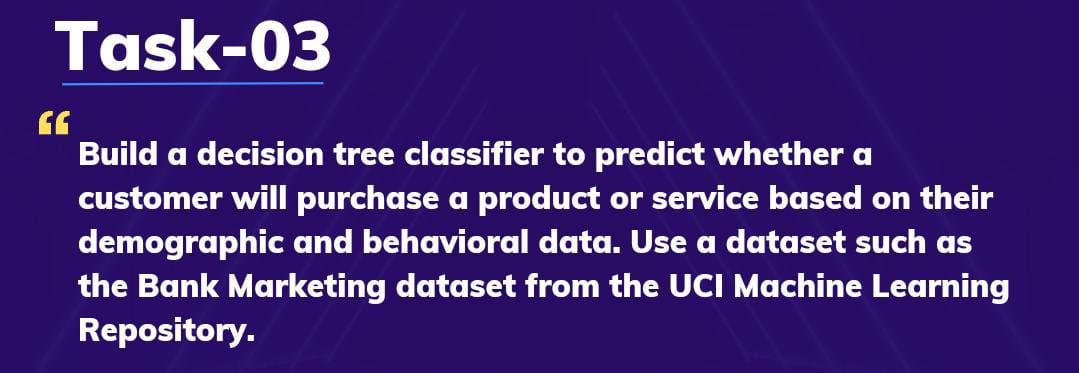

In [9]:
from IPython.display import Image
Image(filename=r"C:\Users\suman\OneDrive\Pictures\WhatsApp Image 2024-06-17 at 13.50.01_f171b8b7.jpg")

In [10]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import csv

## LODING DATASET

In [11]:
import pandas as pd
df = pd.read_csv(r"C:\Users\suman\OneDrive\Desktop\bank-direct-marketing-campaigns.csv")

In [12]:
df.shape

(41188, 20)

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [17]:
df.dtypes.value_counts()

object     11
float64     5
int64       4
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [19]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [20]:
df.duplicated().sum()

1784

In [21]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## separating categorical and number values (rows & columns)

In [22]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [23]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [24]:
df.describe(exclude='object')

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Plotting Hisplot

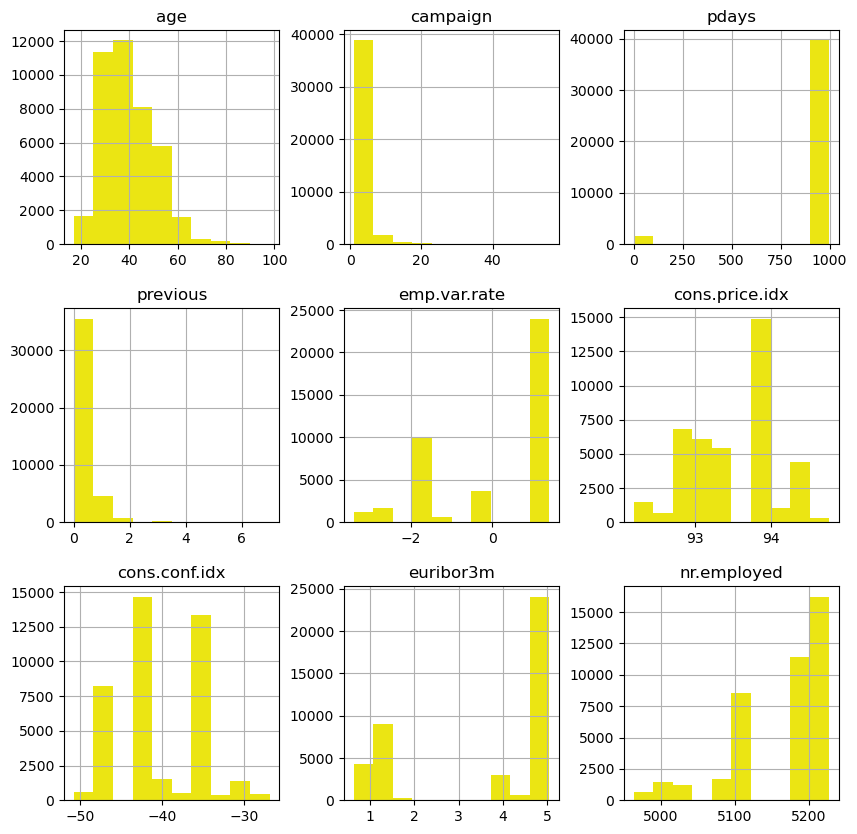

In [25]:
df.hist(figsize=(10,10),color='#EBE513')
plt.show()

# VISUALIZATIONS FOR CATEGORICAL VALUES

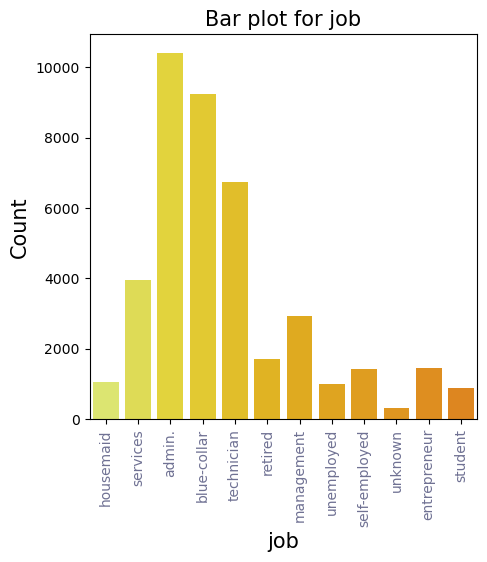

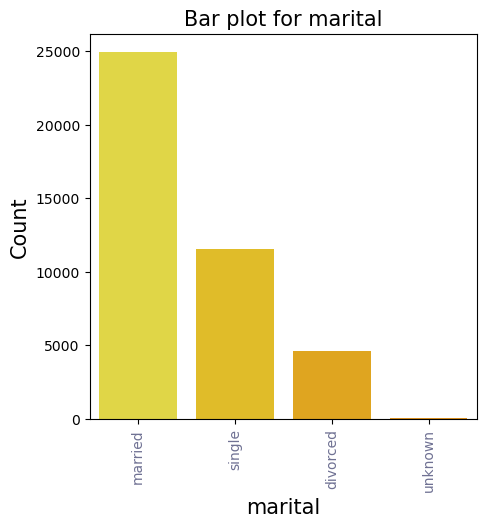

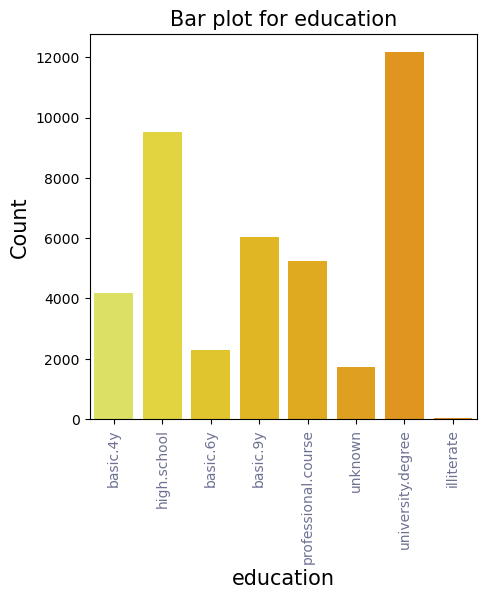

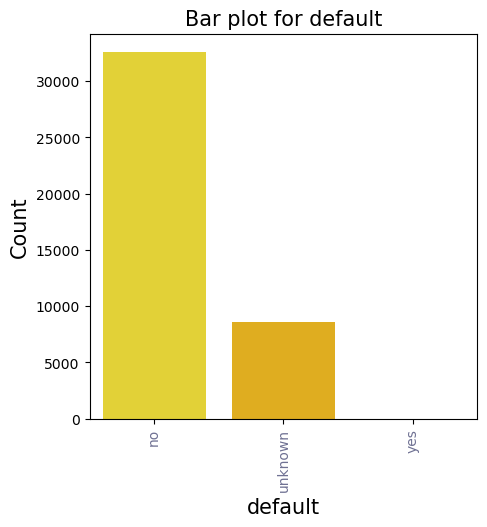

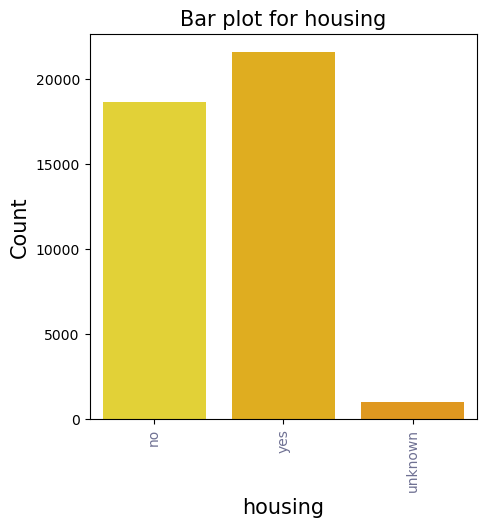

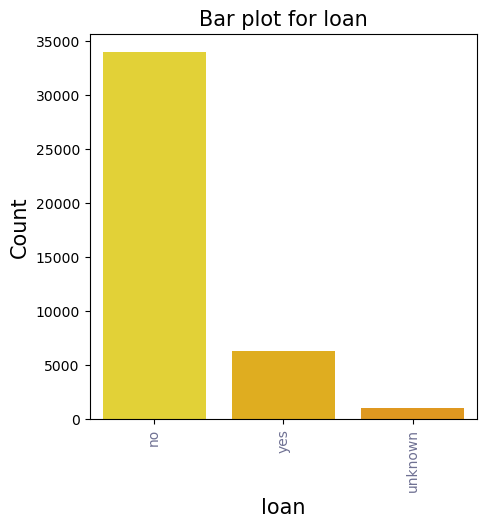

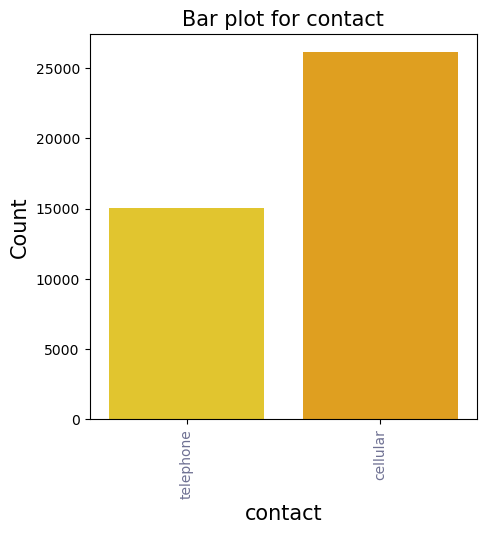

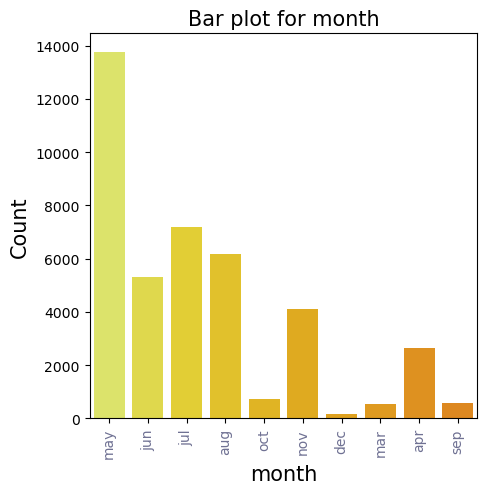

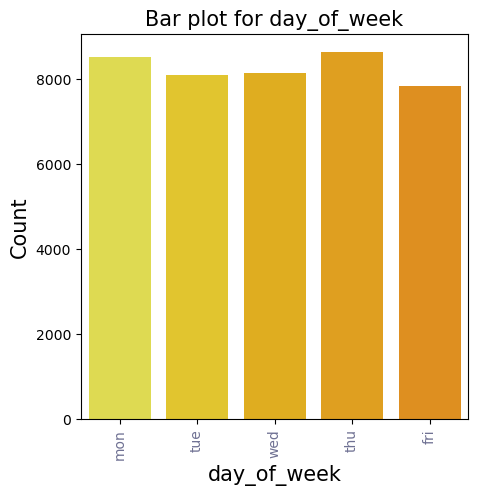

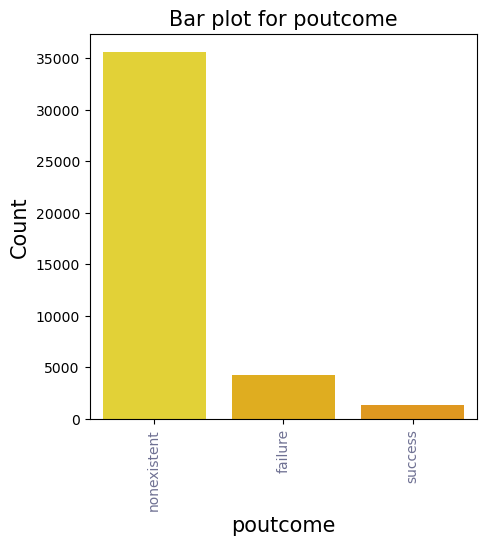

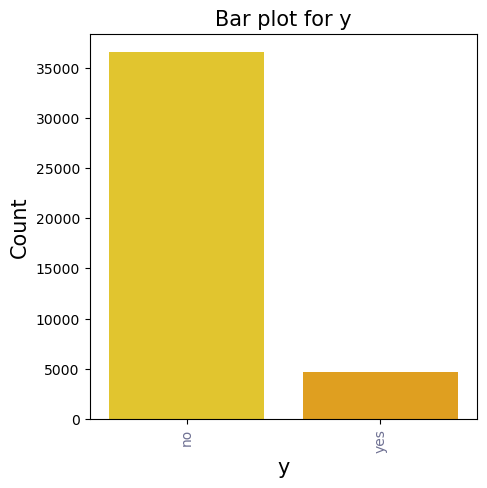

In [26]:
for feature in cat_cols:
     plt.figure(figsize=(5,5)) #adjust the figure size as needed
     sns.countplot(x=feature,data=df,palette='Wistia')
     plt.title(f'Bar plot for {feature}',fontsize=15)
     plt.xlabel(feature,fontsize=15)
     plt.ylabel('Count',fontsize=15)
     plt.xticks(rotation=90,color='#6F7193',fontsize=10)
     plt.show()

## Classification of Outlayers on categorical values

In [27]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


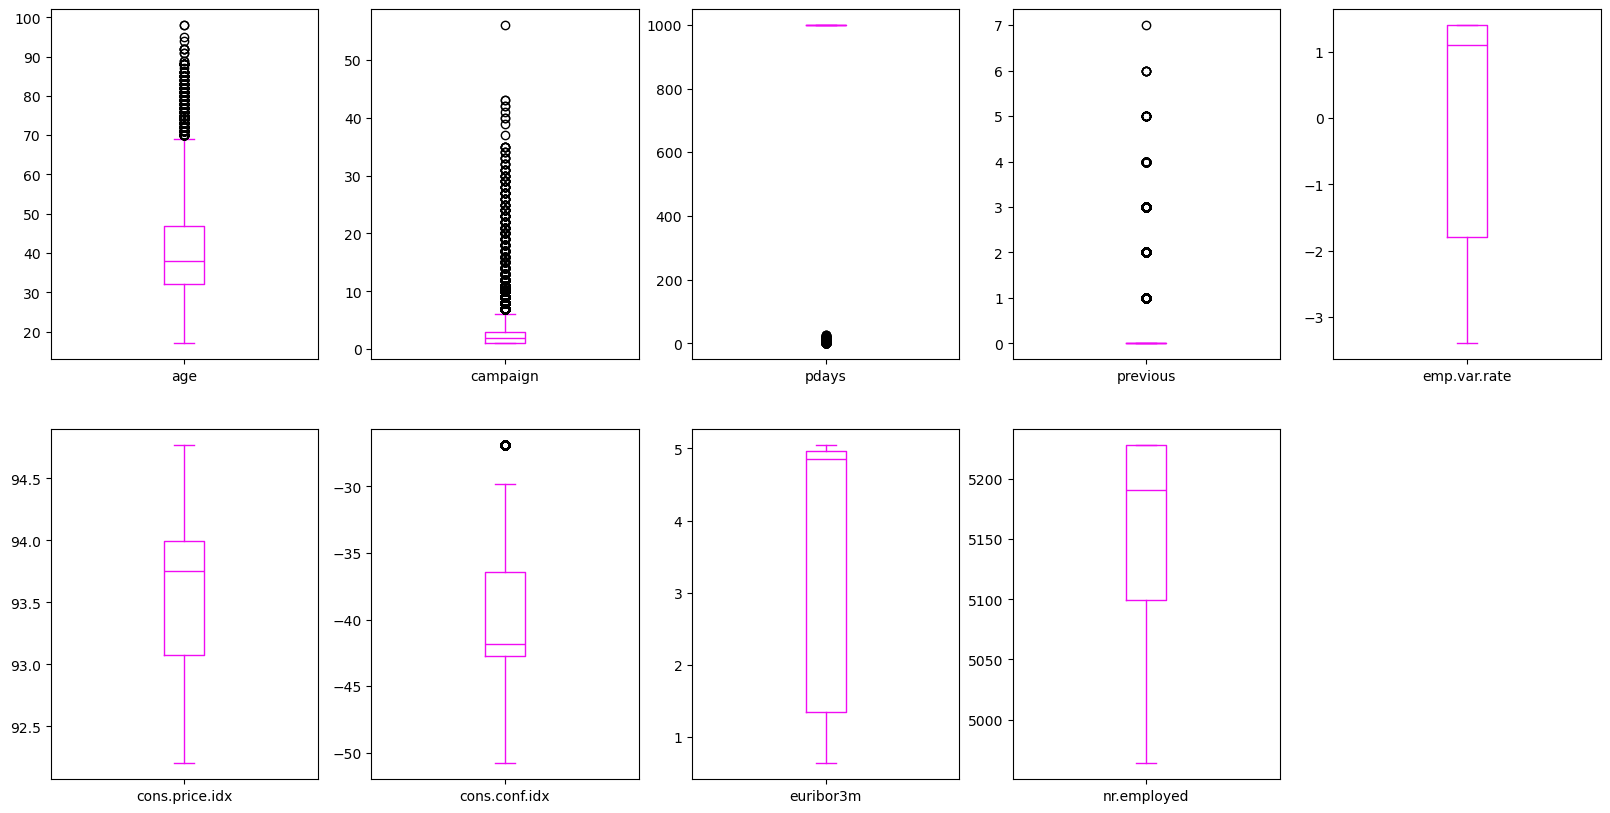

In [28]:
# outlayers =  it is deviating our results or it is extream data point
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='#F00BF3')
plt.show()

### performing outlier detection and removal on two columns, 'age' and 'campaign'

In [29]:
column = df[['age','campaign']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign']] = column[(column > lower_bound) & (column < upper_bound)]

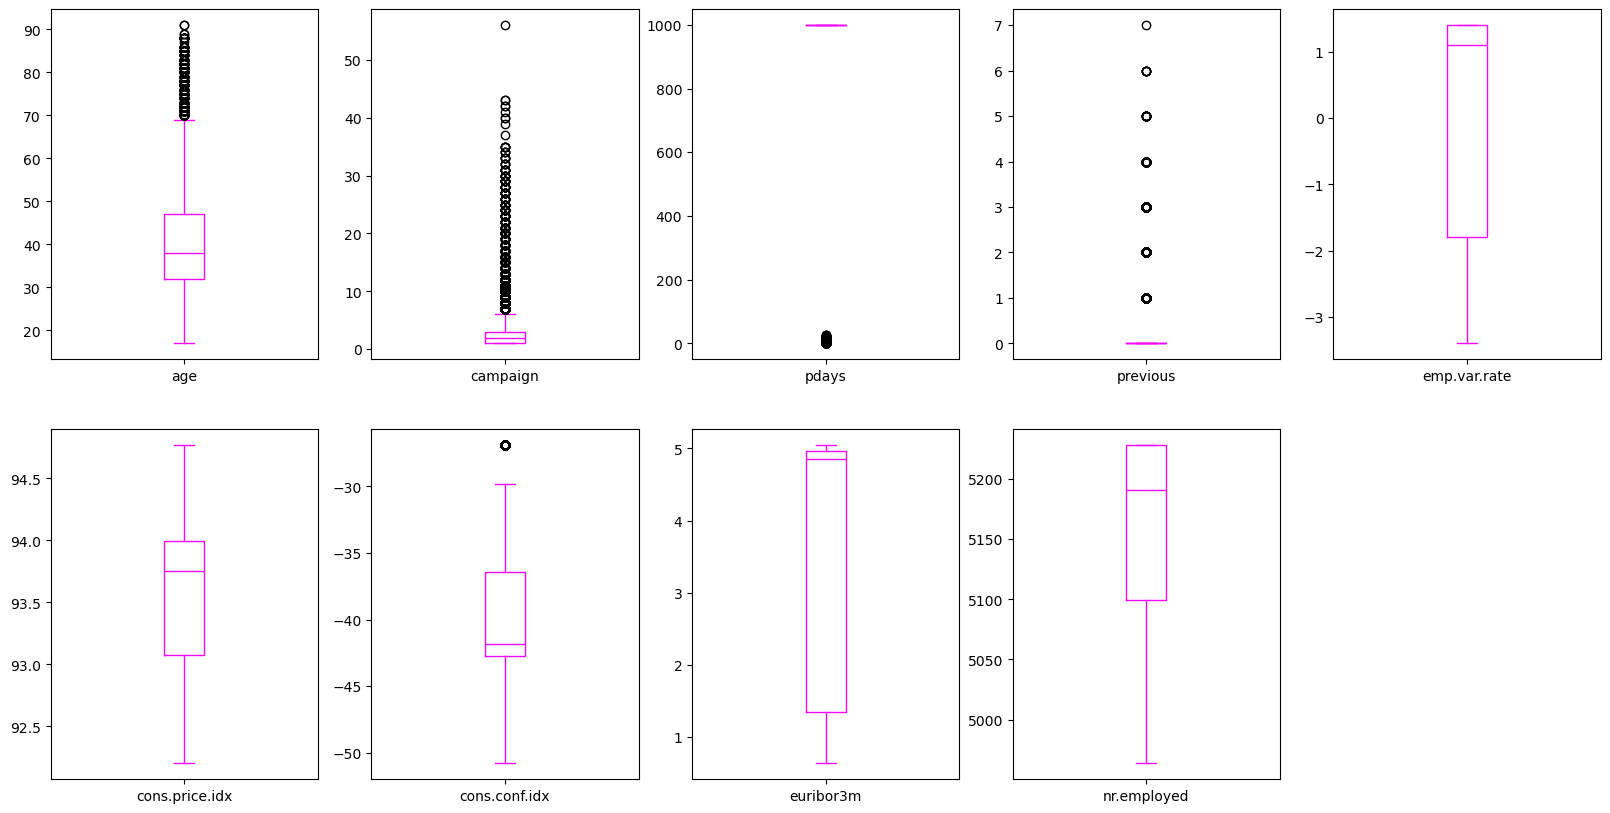

In [30]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='#F00BF3')
plt.show()

<Figure size 1600x900 with 0 Axes>

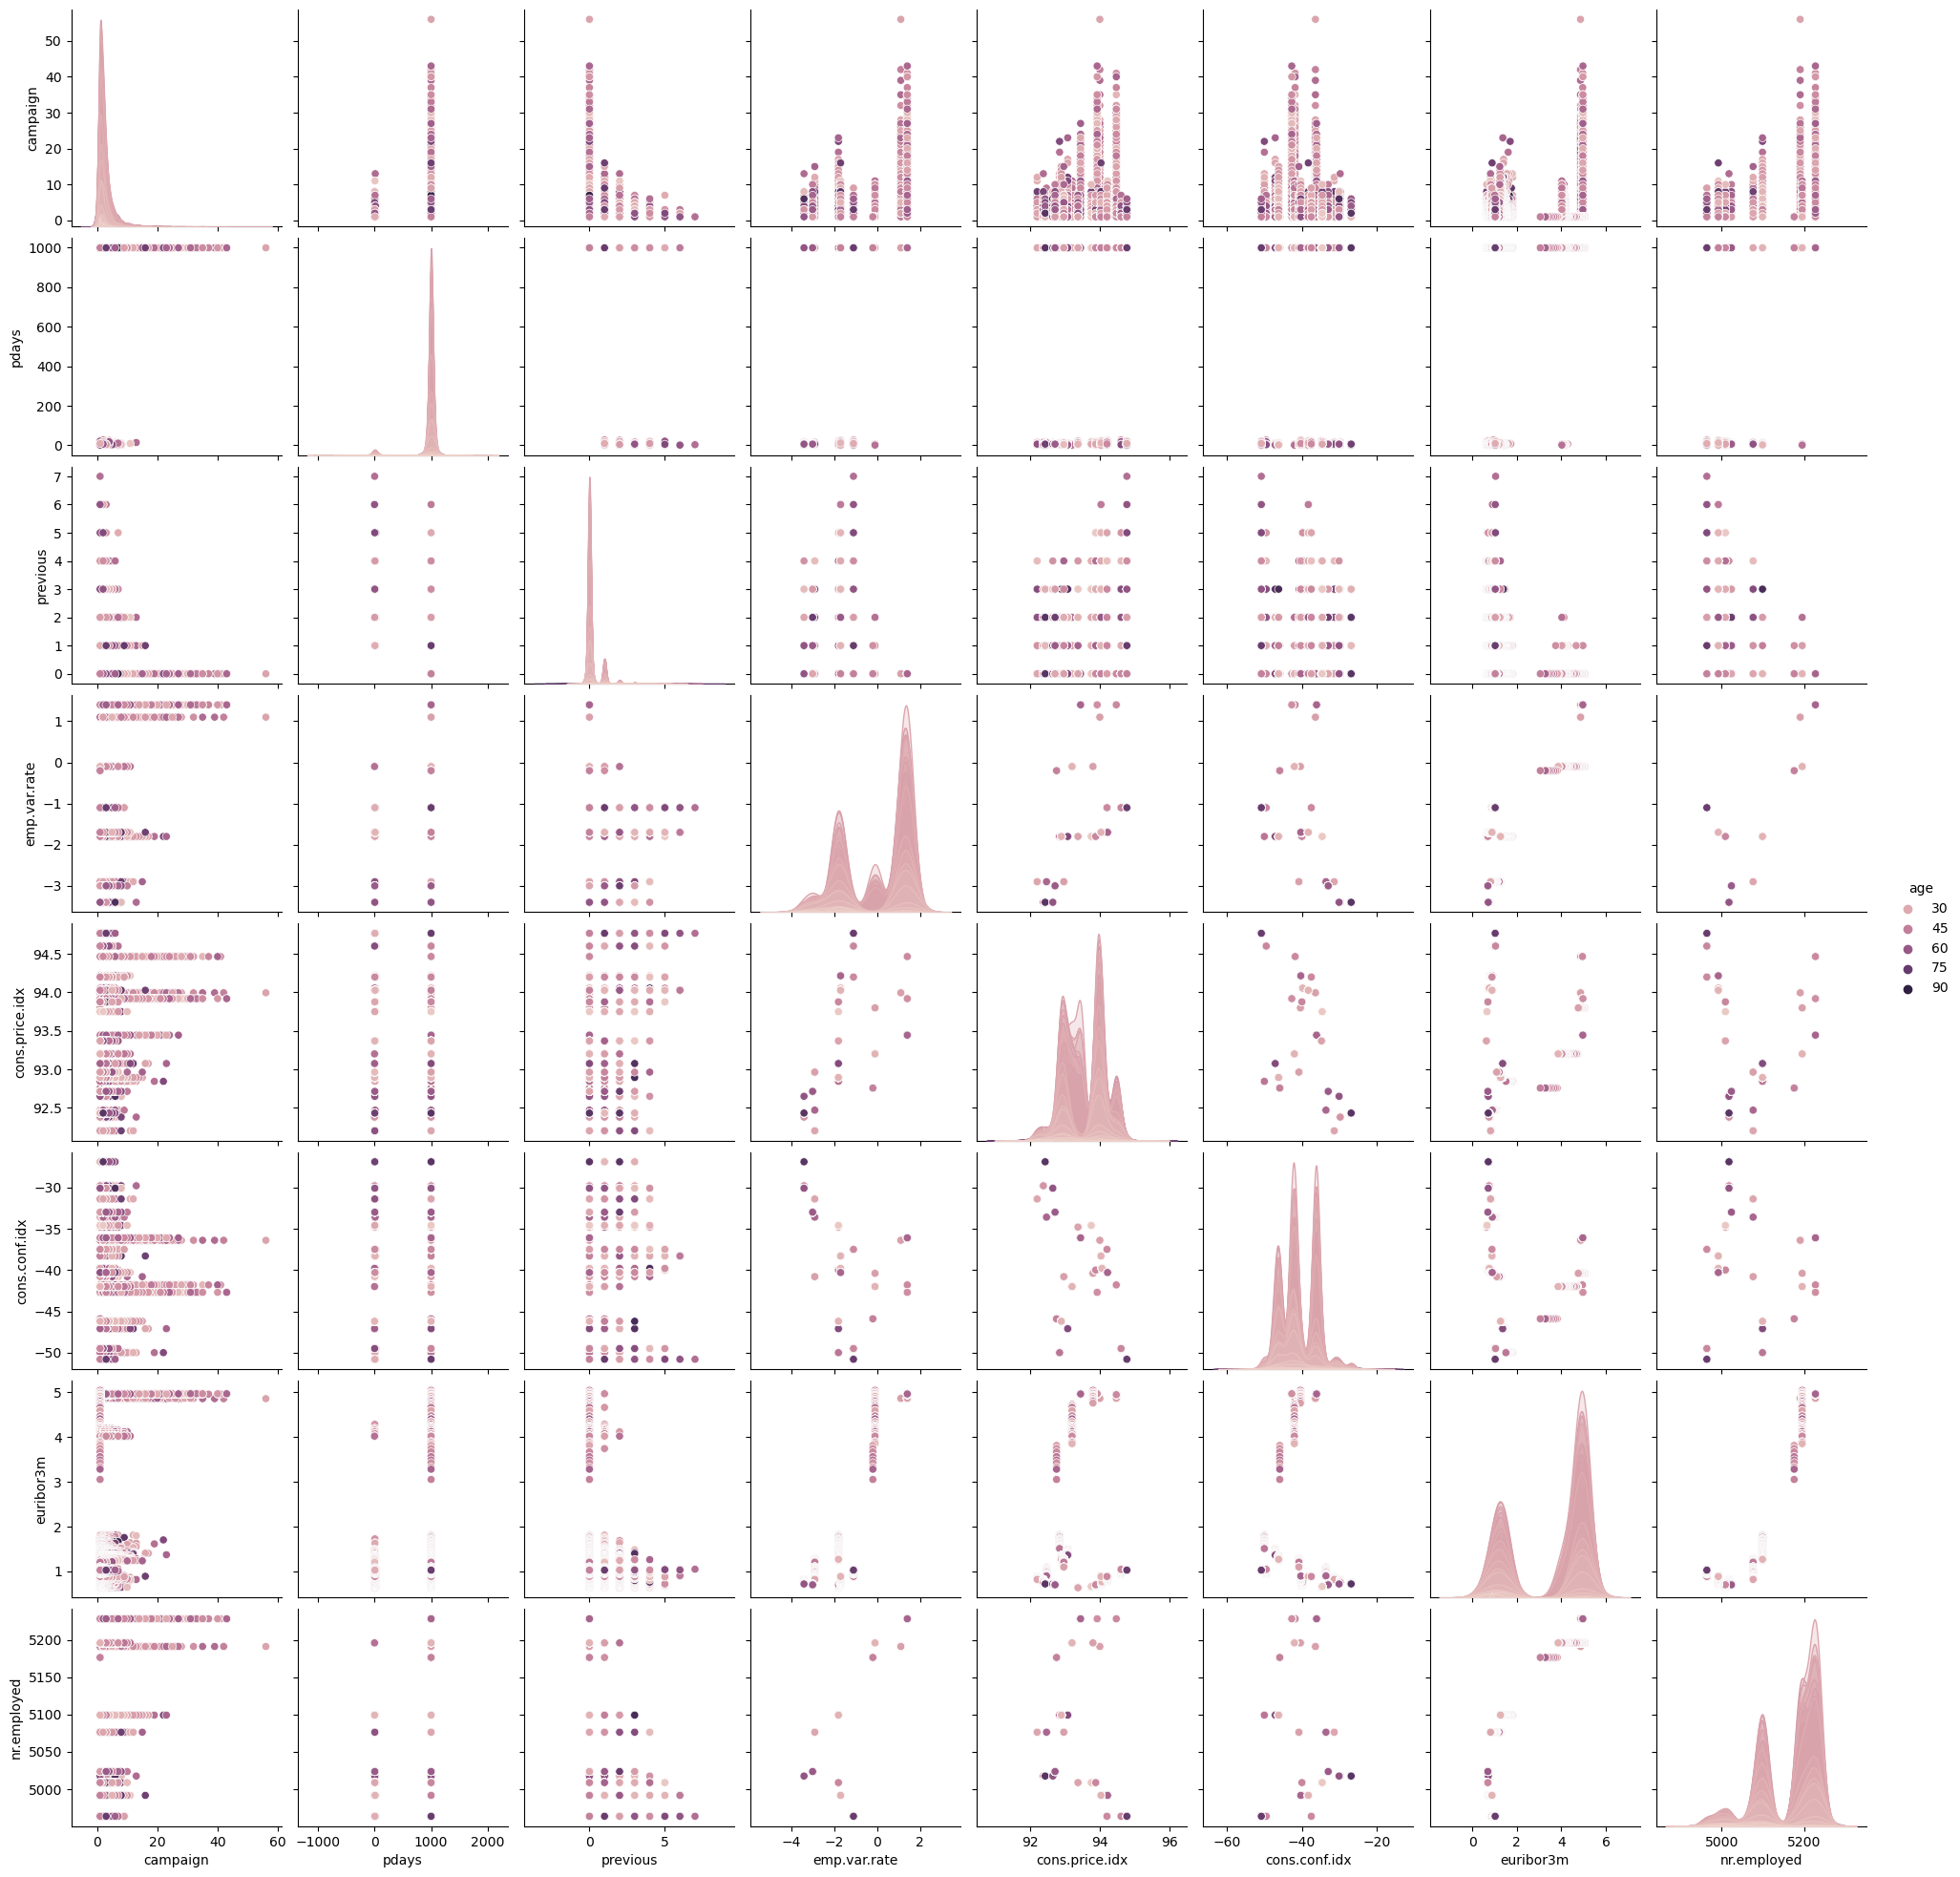

In [32]:
plt.figure(figsize = (16,9))
sns.pairplot(data = df, hue = "age")
plt.show()

## Plotting Correlation Plot

                     age  campaign     pdays  previous  emp.var.rate  \
age             1.000000  0.005041 -0.032036  0.022043      0.001229   
campaign        0.005041  1.000000  0.052584 -0.079141      0.150754   
pdays          -0.032036  0.052584  1.000000 -0.587514      0.271004   
previous        0.022043 -0.079141 -0.587514  1.000000     -0.420489   
emp.var.rate    0.001229  0.150754  0.271004 -0.420489      1.000000   
cons.price.idx  0.001444  0.127836  0.078889 -0.203130      0.775334   
cons.conf.idx   0.128797 -0.013733 -0.091342 -0.050936      0.196041   
euribor3m       0.012399  0.135133  0.296899 -0.454494      0.972245   
nr.employed    -0.015714  0.144095  0.372605 -0.501333      0.906970   

                cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
age                   0.001444       0.128797   0.012399    -0.015714  
campaign              0.127836      -0.013733   0.135133     0.144095  
pdays                 0.078889      -0.091342   0.296899     0.

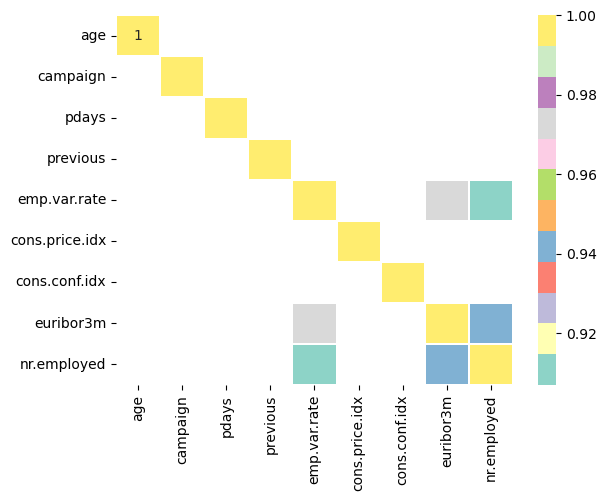

In [33]:
numeric_df = df.select_dtypes(include=[np.number])
# Calculate the correlation matrix
corr = numeric_df.corr()
# Print the correlation matrix
print(corr)
# Filter the correlation matrix to show only high correlations (absolute value >= 0.90)
high_corr = corr[abs(corr) >= 0.90]
# Plot the heatmap
sns.heatmap(high_corr, annot=True, cmap='Set3', linewidths=0.2)
# Show the plot
plt.show()

## Droping Cabing Column

In [50]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [51]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [52]:
df1.drop(high_corr_cols,inplace=True,axis=1) #axis=1 indicates for columns
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'y'],
      dtype='object')

In [53]:
df1.shape

(41188, 17)

In [54]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Convert categorical data into numerical data

In [55]:
from sklearn.preprocessing import LabelEncoder
Ib = LabelEncoder()
df_encoded = df1.apply(Ib.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,39,3,1,0,0,0,0,1,6,1,0,26,0,1,18,16,0
1,40,7,1,3,1,0,0,1,6,1,0,26,0,1,18,16,0
2,20,7,1,3,0,2,0,1,6,1,0,26,0,1,18,16,0
3,23,0,1,1,0,0,0,1,6,1,0,26,0,1,18,16,0
4,39,7,1,3,0,0,2,1,6,1,0,26,0,1,18,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,0,26,0,1,25,0,1
41184,29,1,1,5,0,0,0,0,7,0,0,26,0,1,25,0,0
41185,39,5,1,6,0,2,0,0,7,0,1,26,0,1,25,0,0
41186,27,9,1,5,0,0,0,0,7,0,0,26,0,1,25,0,1


#### COUNTING THE DE CODED VALUES

In [56]:
df_encoded['marital'].value_counts()

marital
1    24928
2    11568
0     4612
3       80
Name: count, dtype: int64

## Droping encoded Column

In [57]:
x = df_encoded.drop('job',axis=1) #independent variable
y = df_encoded['job'] #dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(41188, 16)
(41188,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## Data Splitting Calculation for encoded data

In [59]:
#Purpose: The code calculates the size of the test set when using train_test_split.
#Calculation: It determines that 50% of a dataset with 4119 samples is approximately 1029.75 samples.
#Use Case: This calculation helps in understanding how many samples will be allocated to the test set when
#splitting the data. For instance, if you have 4119 samples and want to use 25% for testing, you will 
#have around 1030 samples in your test set.
from sklearn.model_selection import train_test_split
print(4119*0.50)

2059.5


### Printing the Shapes of the Resulting Sets

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30891, 16)
(10297, 16)
(30891,)
(10297,)


###  Define two utility functions for evaluating a machine learning process

In [62]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score', acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n', classification_report(y_test,y_pred))

def mscore (model):
   train_score = model.score(x_train,y_train)
   test_score = model.score(x_test,y_test)
   print('Training Score', train_score)
   print('Testing Score', test_score)

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [79]:
mscore(dt)

Training Score 0.5154575766404454
Testing Score 0.5089831989899971


In [67]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[1 1 0 ... 0 0 0]


In [68]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.5089831989899971
Confusion Matrix
 [[2201  221    0    0    0   29    0    0   30   76    0    0]
 [ 236 1925    0    0    0   26    0    0   16  100    0    0]
 [ 233  109    0    0    0    6    0    0    2   29    0    0]
 [  92  156    0    1    0   22    0    0    0   12    0    0]
 [ 575  111    0    0    0   17    0    0    0   24    0    0]
 [ 103  102    0    1    0  244    0    0    0   16    0    0]
 [ 232   86    0    0    0    7    0    0    1   40    0    0]
 [ 704  221    0    0    0    6    0    0   30   41    0    0]
 [  89   52    0    0    0    0    0    0   88   11    0    0]
 [ 665  160    0    0    0   43    0    0    7  782    0    0]
 [ 116   88    0    0    0    6    0    0    3   34    0    0]
 [  22   38    0    0    0    7    0    0    0    3    0    0]]
Classification Report
               precision    recall  f1-score   support

           0       0.42      0.86      0.56      2557
           1       0.59      0.84      0.69      2303
     

In [75]:
unique_classes = np.unique(y)
print(unique_classes)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [76]:
cn = [str(cls) for cls in unique_classes]
print(cn)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']


In [78]:
cn=['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'y'],
      dtype='object')
['no', 'yes']


### Visulization of DecisionTreeClassifier

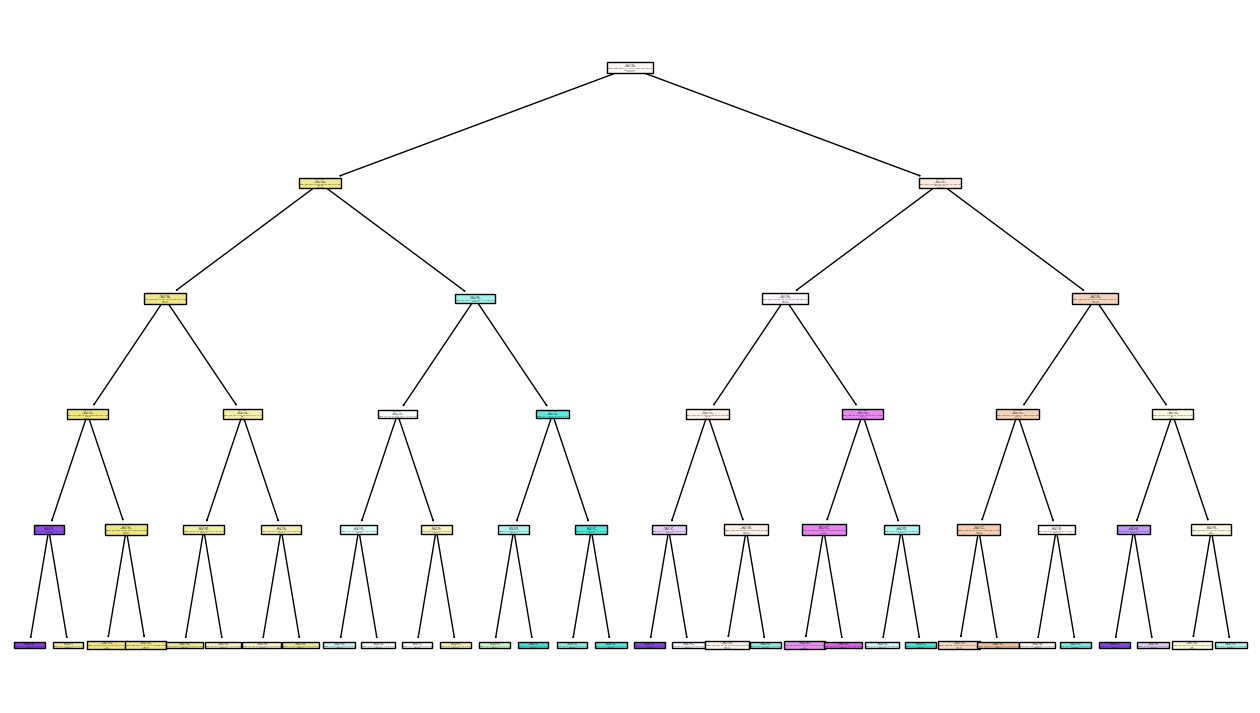

In [77]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plot_tree(dt, class_names=cn, filled=True)
plt.show()


In [96]:
dt1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [97]:
mscore(dt1)

Training Score 0.9714285714285714
Testing Score 1.0


In [98]:
ypred_dt1 = dt1.predict(x_test)

In [99]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 1.0
Confusion Matrix
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## TREE VISUALIZATION 

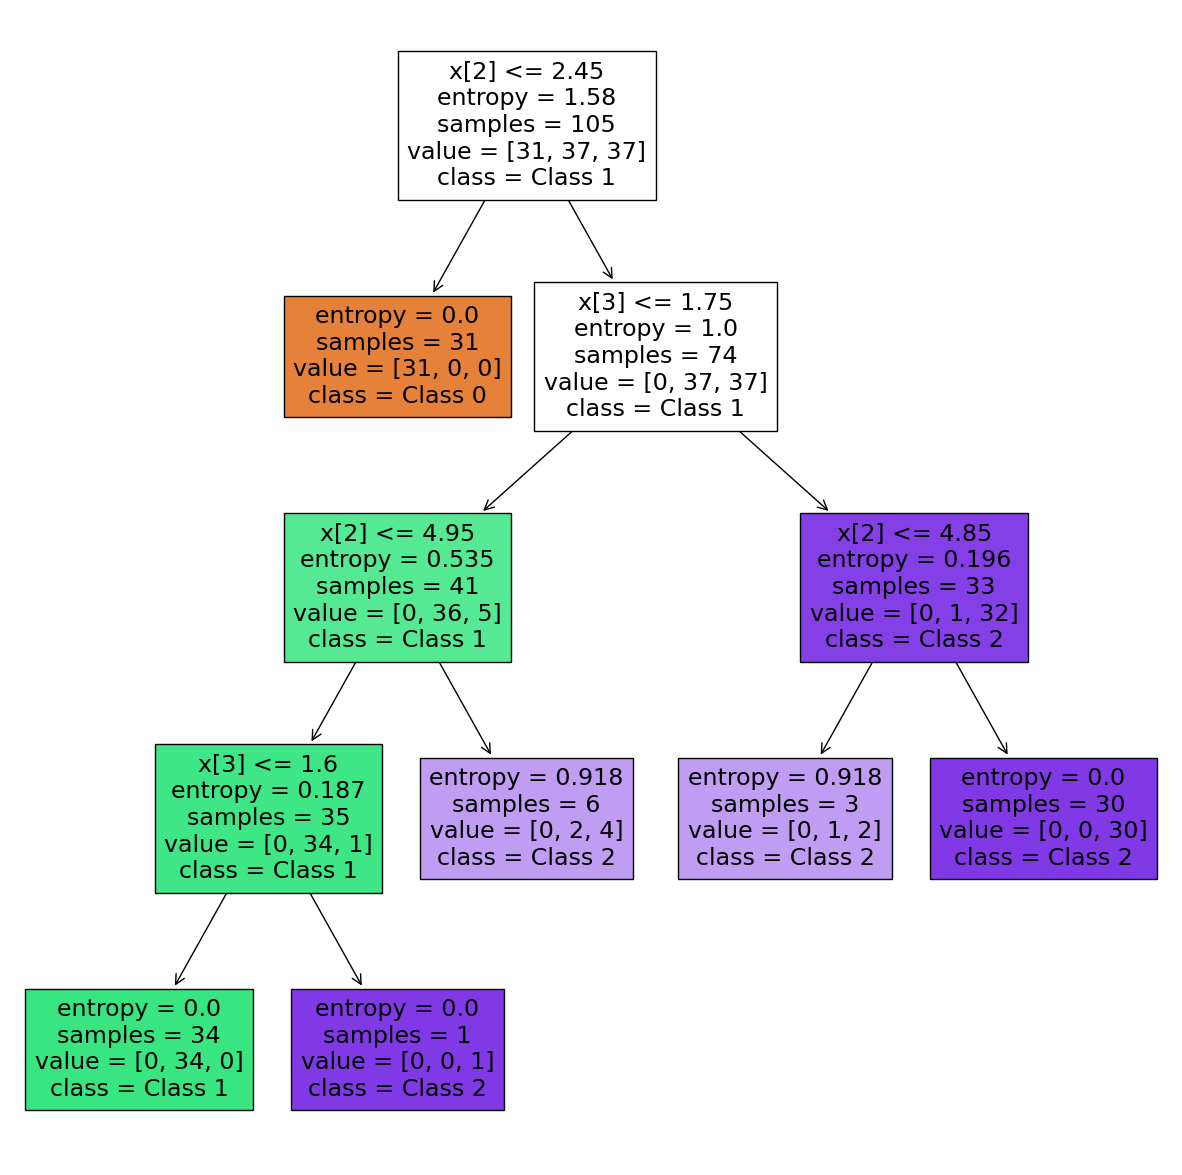

In [100]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()